In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_size = 256
batch_size = 60
RBG = 3
Epcho = 25

Load Data into tensorflow dataset

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=(batch_size)
                                                   
)

Found 4757 files belonging to 10 classes.


In [4]:
class_Name=dataset.class_names
class_Name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

80

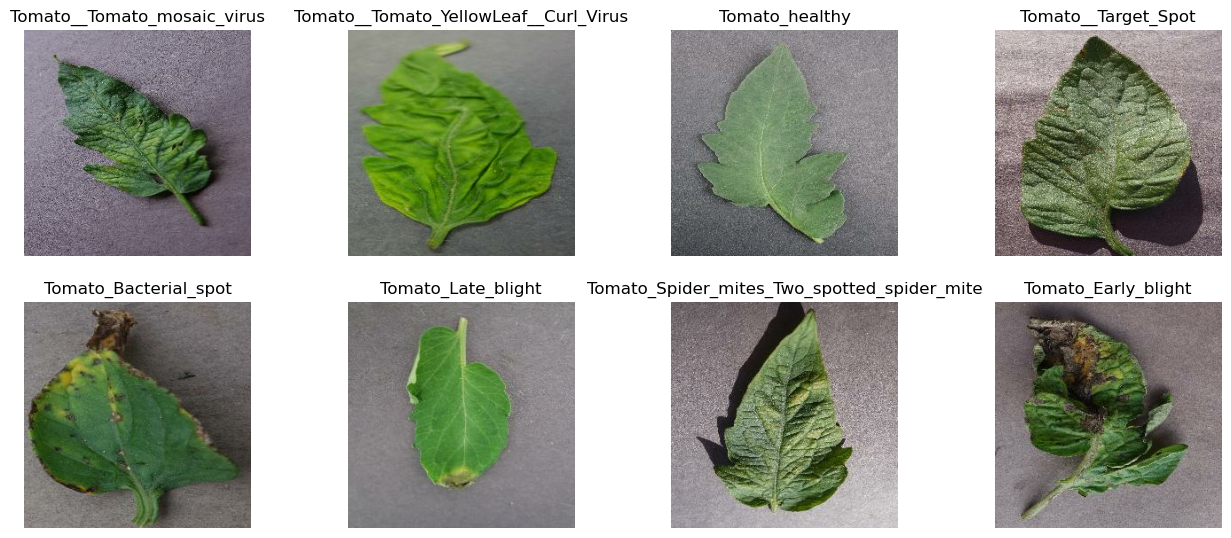

In [6]:
plt.figure(figsize=(16,10))
for image_batch,label_batch in dataset.take(1):
    for i in range (8):
        ax= plt.subplot(3,4,i+1)
        plt.title(class_Name[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

created function to get train,validation,and test datas 

In [7]:
def preprocess_tf(data,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shu_size=100):
    ds_size =len(data)
    
    if shuffle:
        data = data.shuffle(shu_size,seed = 50)
    
    train_size = int(train_split * ds_size )
    
    valu_size = int(val_split*ds_size)
    
    train_ds = data.take(train_size)
    
    valu_ds = data.skip(train_size).take(valu_size)
    
    test_ds = data.skip(train_size).skip(valu_size)
    
    return train_ds,valu_ds,test_ds

In [8]:
train_ds,valu_ds,test_ds=preprocess_tf(dataset)

In [9]:
len(train_ds),len(valu_ds),len(test_ds)

(64, 8, 8)

Data Augmentation Process and Resizing

In [10]:
train_ds=train_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)
valu_ds=valu_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

Model building Convolutional neural network (CNN)

In [13]:
input_shape = (batch_size,image_size,image_size,RBG)
n_class = 10
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(20,(2,2),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_class,activation='softmax')
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (60, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (60, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (60, 255, 255, 20)        260       
                                                                 
 max_pooling2d (MaxPooling2  (60, 127, 127, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (60, 126, 126, 64)        5184      
                                                                 
 max_pooling2d_1 (MaxPoolin  (60, 63, 63, 64)          0         
 g2D)                                                 

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics= ['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    epochs= Epcho,
    batch_size=batch_size,
    verbose=1,
    validation_data=valu_ds
)

Epoch 1/25
64/64 [==============================] - 1012s 14s/step - loss: 2.0919 - accuracy: 0.2596 - val_loss: 1.5177 - val_accuracy: 0.5188
Epoch 2/25
64/64 [==============================] - 394s 6s/step - loss: 1.2510 - accuracy: 0.5672 - val_loss: 1.0484 - val_accuracy: 0.6542
Epoch 3/25
64/64 [==============================] - 433s 7s/step - loss: 0.9396 - accuracy: 0.6615 - val_loss: 1.0314 - val_accuracy: 0.6687
Epoch 4/25
64/64 [==============================] - 411s 6s/step - loss: 0.7946 - accuracy: 0.7211 - val_loss: 1.0842 - val_accuracy: 0.6729
Epoch 5/25
64/64 [==============================] - 431s 7s/step - loss: 0.6597 - accuracy: 0.7703 - val_loss: 1.0721 - val_accuracy: 0.6854
Epoch 6/25
64/64 [==============================] - 396s 6s/step - loss: 0.6140 - accuracy: 0.7815 - val_loss: 0.7799 - val_accuracy: 0.7333
Epoch 7/25
64/64 [==============================] - 427s 7s/step - loss: 0.5589 - accuracy: 0.8005 - val_loss: 1.0567 - val_accuracy: 0.7042
Epoch 8/25


With 25 epoch get maxium accuracy is 91%

In [17]:
history.history['accuracy']

[0.25963541865348816,
 0.567187488079071,
 0.6614583134651184,
 0.7210937738418579,
 0.770312488079071,
 0.7815104126930237,
 0.8005208373069763,
 0.8151041865348816,
 0.8364583253860474,
 0.8372395634651184,
 0.850781261920929,
 0.8541666865348816,
 0.8549479246139526,
 0.8697916865348816,
 0.8622395992279053,
 0.8721354007720947,
 0.8890625238418579,
 0.8942708373069763,
 0.8958333134651184,
 0.889843761920929,
 0.9059895873069763,
 0.9091145992279053,
 0.9153645634651184,
 0.9106770753860474,
 0.9106770753860474]

Check Predict

first image to predict
actual label : Tomato__Tomato_mosaic_virus
2/2 [==============================] - 27s 555ms/step
predcted label: Tomato__Tomato_mosaic_virus


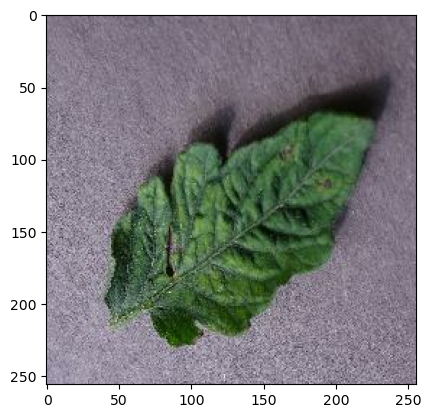

In [18]:
for image_ba, label_ba in test_ds.take(1):
    first_image = image_ba[0].numpy().astype('uint8')
    first_label =  label_ba[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label :',class_Name[first_label])
    
    batch_prediction = model.predict(image_ba)
    print("predcted label:",class_Name[np.argmax(batch_prediction[0])])

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_Name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 93ms/step


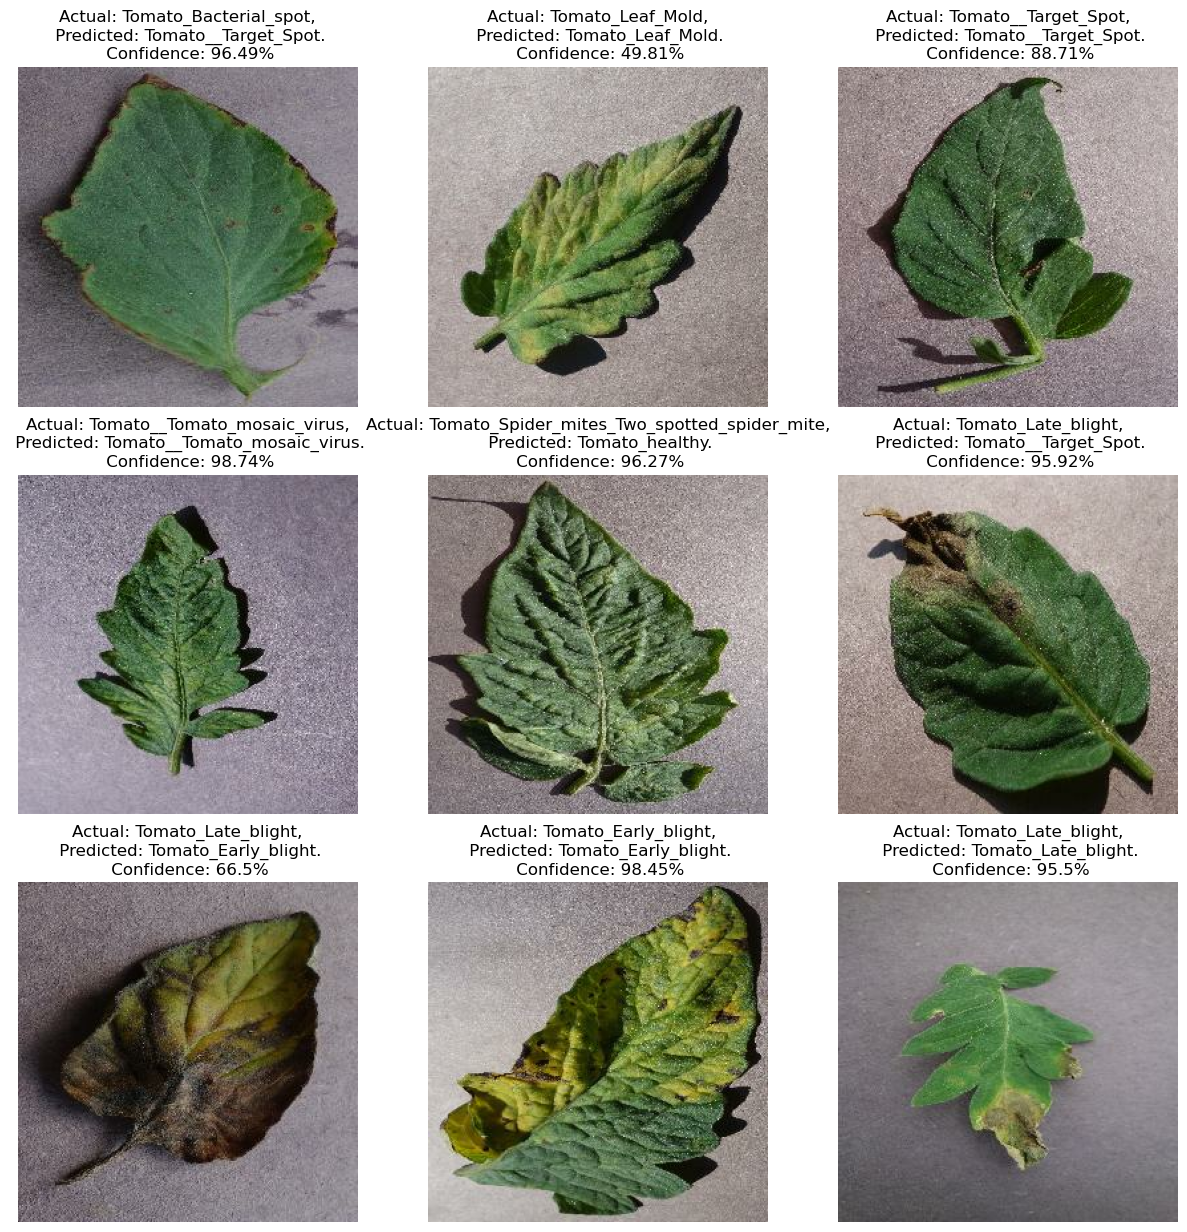

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_Name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

Saving Model

In [21]:
model.save("model.h5")

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 8s 993ms/step - loss: 0.7940 - accuracy: 0.7750


In [24]:
scores

[0.7939971089363098, 0.7749999761581421]

In [25]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 64}

In [26]:
history.history['accuracy']

[0.25963541865348816,
 0.567187488079071,
 0.6614583134651184,
 0.7210937738418579,
 0.770312488079071,
 0.7815104126930237,
 0.8005208373069763,
 0.8151041865348816,
 0.8364583253860474,
 0.8372395634651184,
 0.850781261920929,
 0.8541666865348816,
 0.8549479246139526,
 0.8697916865348816,
 0.8622395992279053,
 0.8721354007720947,
 0.8890625238418579,
 0.8942708373069763,
 0.8958333134651184,
 0.889843761920929,
 0.9059895873069763,
 0.9091145992279053,
 0.9153645634651184,
 0.9106770753860474,
 0.9106770753860474]

In [27]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

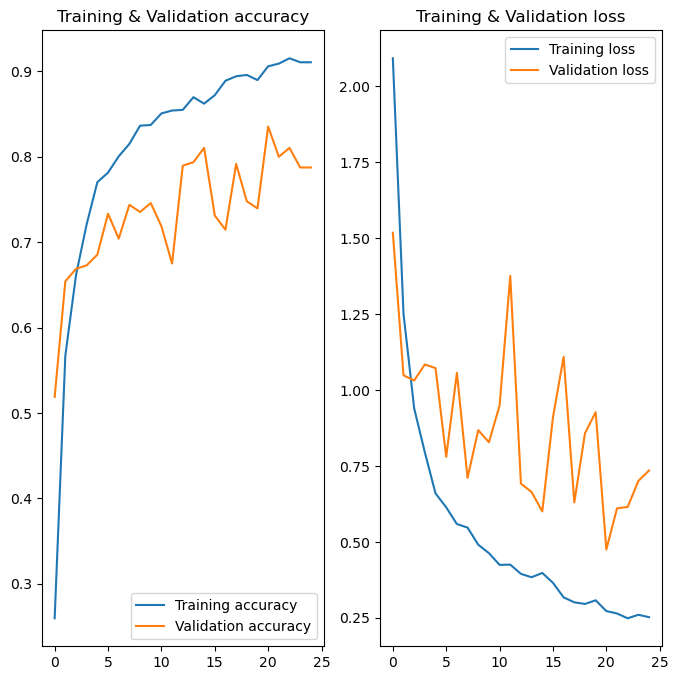

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epcho),acc,label='Training accuracy')
plt.plot(range(Epcho),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epcho),loss,label='Training loss')
plt.plot(range(Epcho),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training & Validation loss')
plt.show()

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_Name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


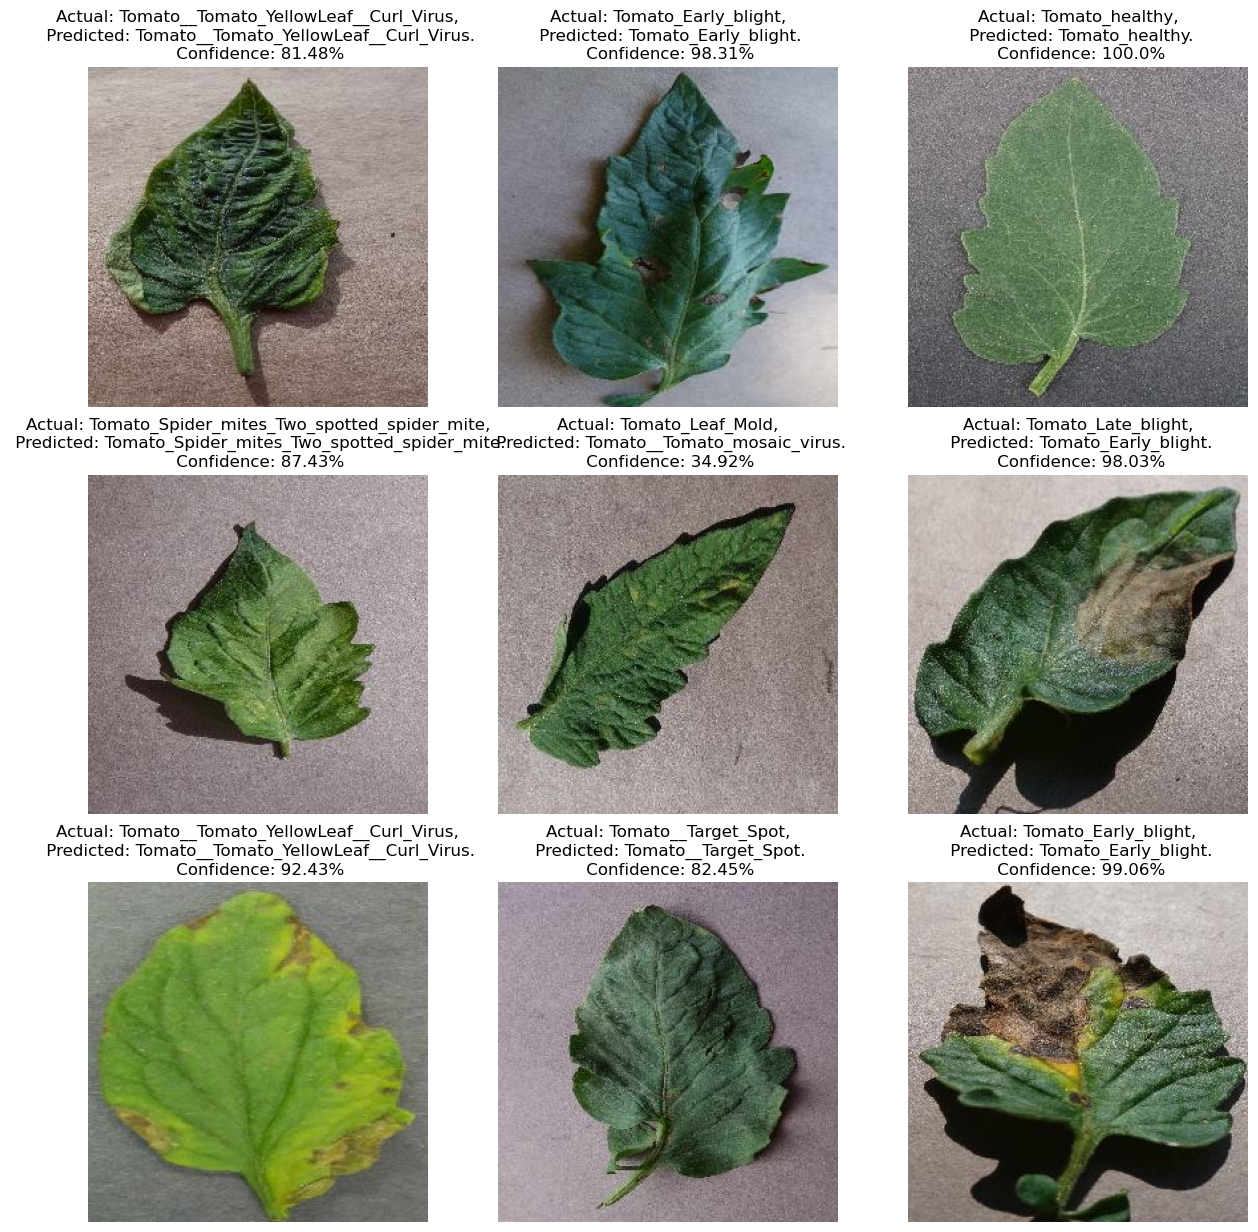

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_Name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")